# Assignment for day 8 of the 12 day prep, hosting a notebook on Binder

In [144]:
# uncomment to install requirements if needed
# !pip install -r requirements.txt

In [105]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
# load the data
data=pd.read_csv(r'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

## This section is answering the questions from day four for working with pandas

In [12]:
# 1. How many different companies are represented in the data set?
print(data['Company Name'].unique().size)

439


In [59]:
# 2. What is the total number of jobs created for businesses in Queens?
# "QUEENS" has no jobs created so I ignore it, also ignoring that some neighborhoods like "Forest Hills" and "Jamaica" are actually in queens
print(data.groupby('City').sum().loc[['Queens'],'Job created'])

City
Queens    90.0
Name: Job created, dtype: float64


In [56]:
# 3. How many different unique email domains names are there in the data set?
print(data['company email'].str.extract(r'.*@(.*\.[a-z]{2,3}$)')[0].unique().size)

351


In [106]:
# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs
#    created for each NTA?
list_count = data.groupby('NTA').count()['Company Name']
keep_NTAs = list_count[list_count>=5].index
new_data = []
for NTA in keep_NTAs:
    new_data.append(data[data['NTA']==NTA])
new_data=pd.concat(new_data)

out1 = new_data.groupby('NTA').mean()[['Savings from beginning receiving benefits']]
out2 = new_data.groupby('NTA').sum()[['Job created']]
output = pd.DataFrame(index = keep_NTAs)
output['mean_savings'] = list(out1['Savings from beginning receiving benefits'])
output['total_jobs_created'] = list(out2['Job created'])
output.to_csv('question5.csv')
print(pd.read_csv('question5.csv'))

                                                 NTA  mean_savings  \
0                  Battery Park City-Lower Manhattan  3.798151e+06   
1                                     Bushwick South  3.078000e+05   
2           Carroll Gardens-Columbia Street-Red Hook  1.846839e+05   
3                                      College Point  5.742508e+05   
4                                Crown Heights North  1.716897e+04   
5   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  4.373905e+05   
6                                      East New York  4.579454e+05   
7                                  East Williamsburg  1.433695e+05   
8                                         Greenpoint  1.772221e+05   
9               Hunters Point-Sunnyside-West Maspeth  1.606093e+05   
10                                       Hunts Point  3.976354e+05   
11                                    Manhattanville  2.203059e+04   
12                                           Maspeth  2.078318e+04   
13                  

## This section is for day 5, plotting

<IPython.core.display.Javascript object>


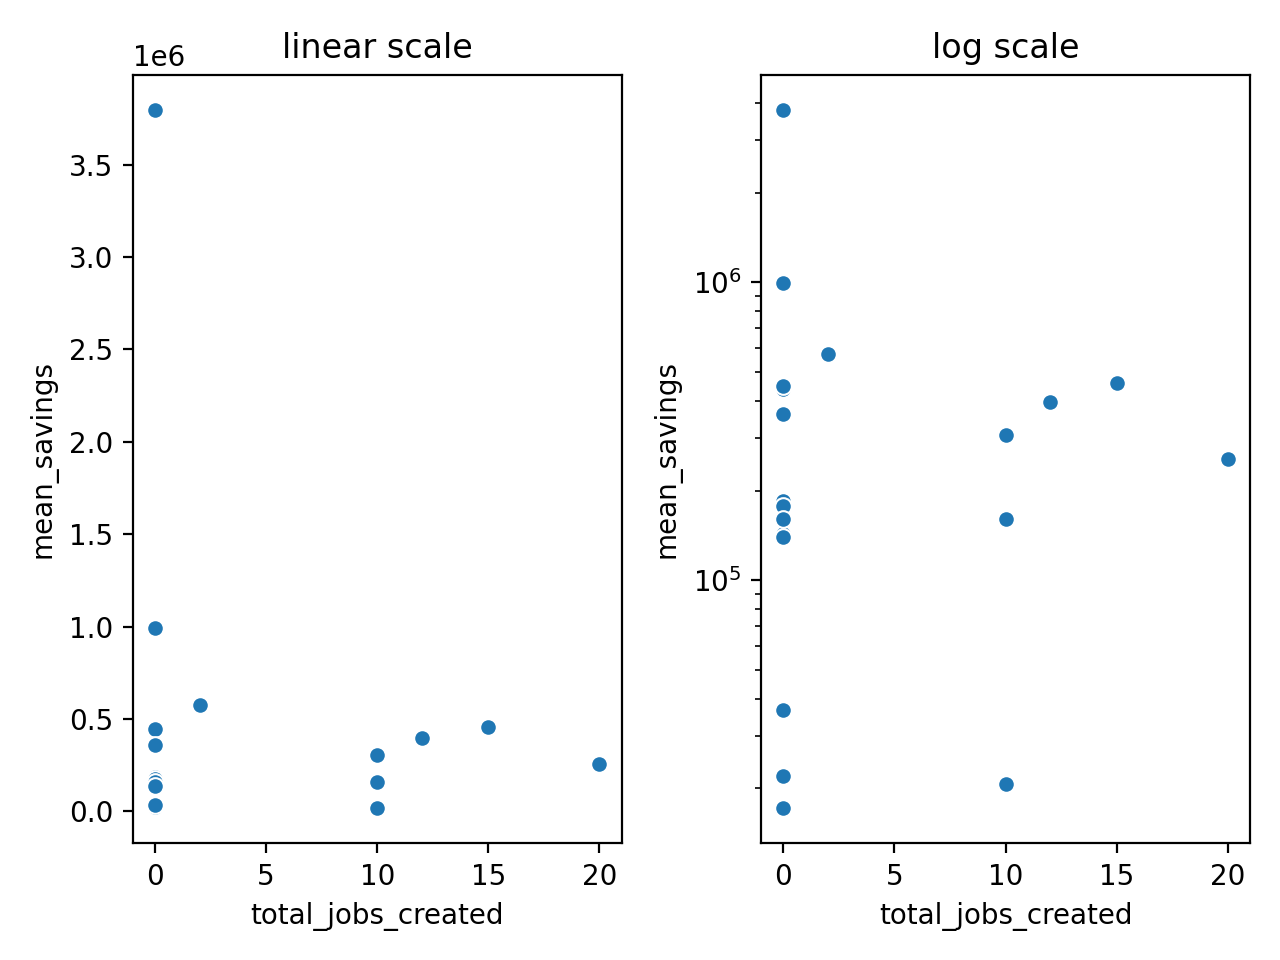

In [123]:
# Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
# scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average 
# savings.
fig,axs = plt.subplots(1,2)
import seaborn as sns
splot = sns.scatterplot(data=output, x='total_jobs_created',y='mean_savings',ax=axs[0])
splot.set(title='linear scale')
splot= sns.scatterplot(data=output, x='total_jobs_created',y='mean_savings',ax=axs[1])
splot.set(yscale='log', title='log scale')

plt.tight_layout()

<IPython.core.display.Javascript object>


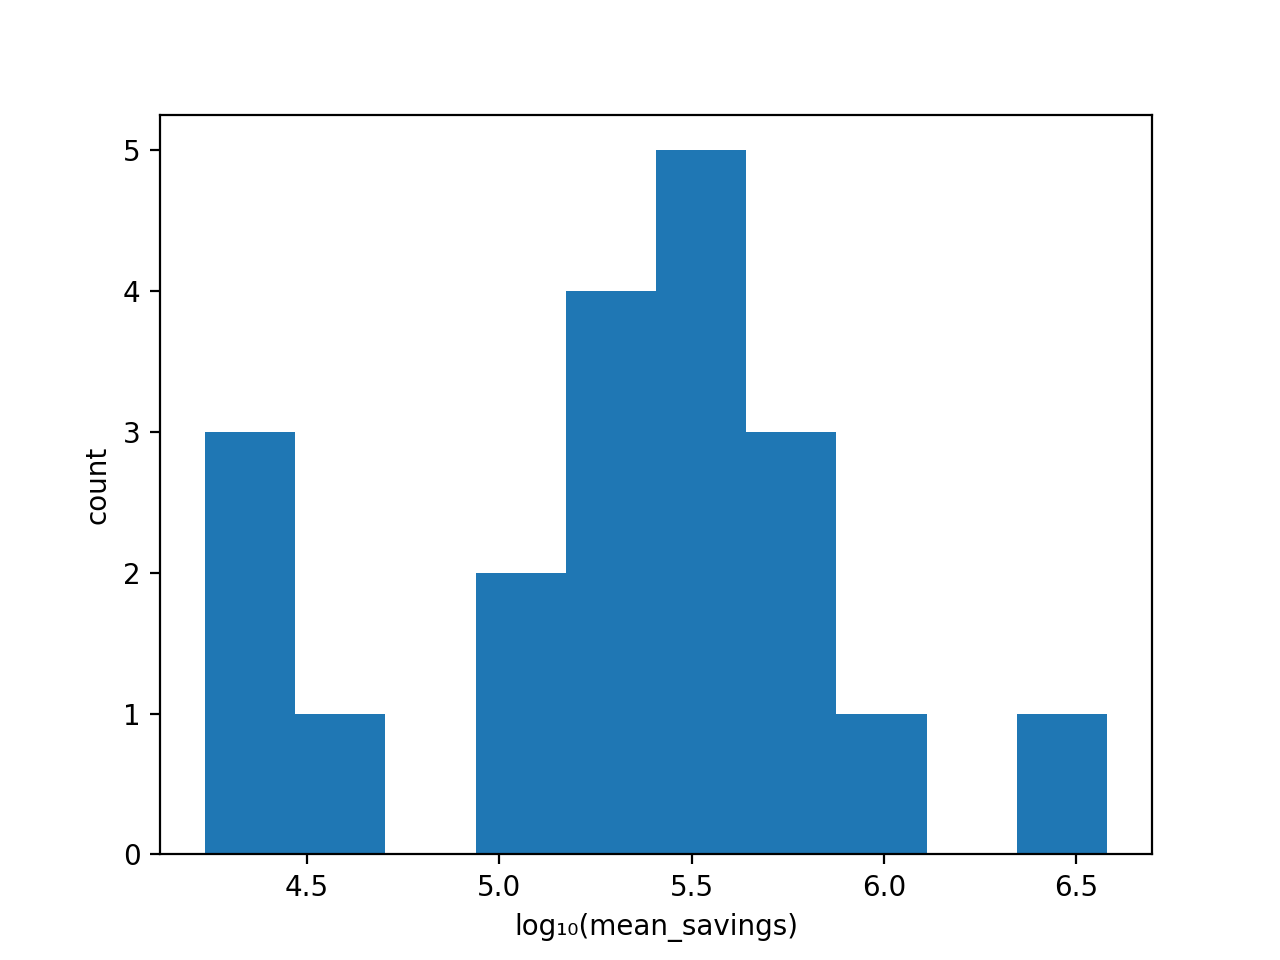

[Text(0.5, 0, 'log₁₀(mean_savings)'), Text(0, 0.5, 'count')]

In [120]:
# plot a histogram of the log of the average total savings.
fig, ax = plt.subplots()
ax.hist(np.log10(output['mean_savings']))
ax.set(xlabel='log\u2081\u2080(mean_savings)',ylabel='count')

<IPython.core.display.Javascript object>


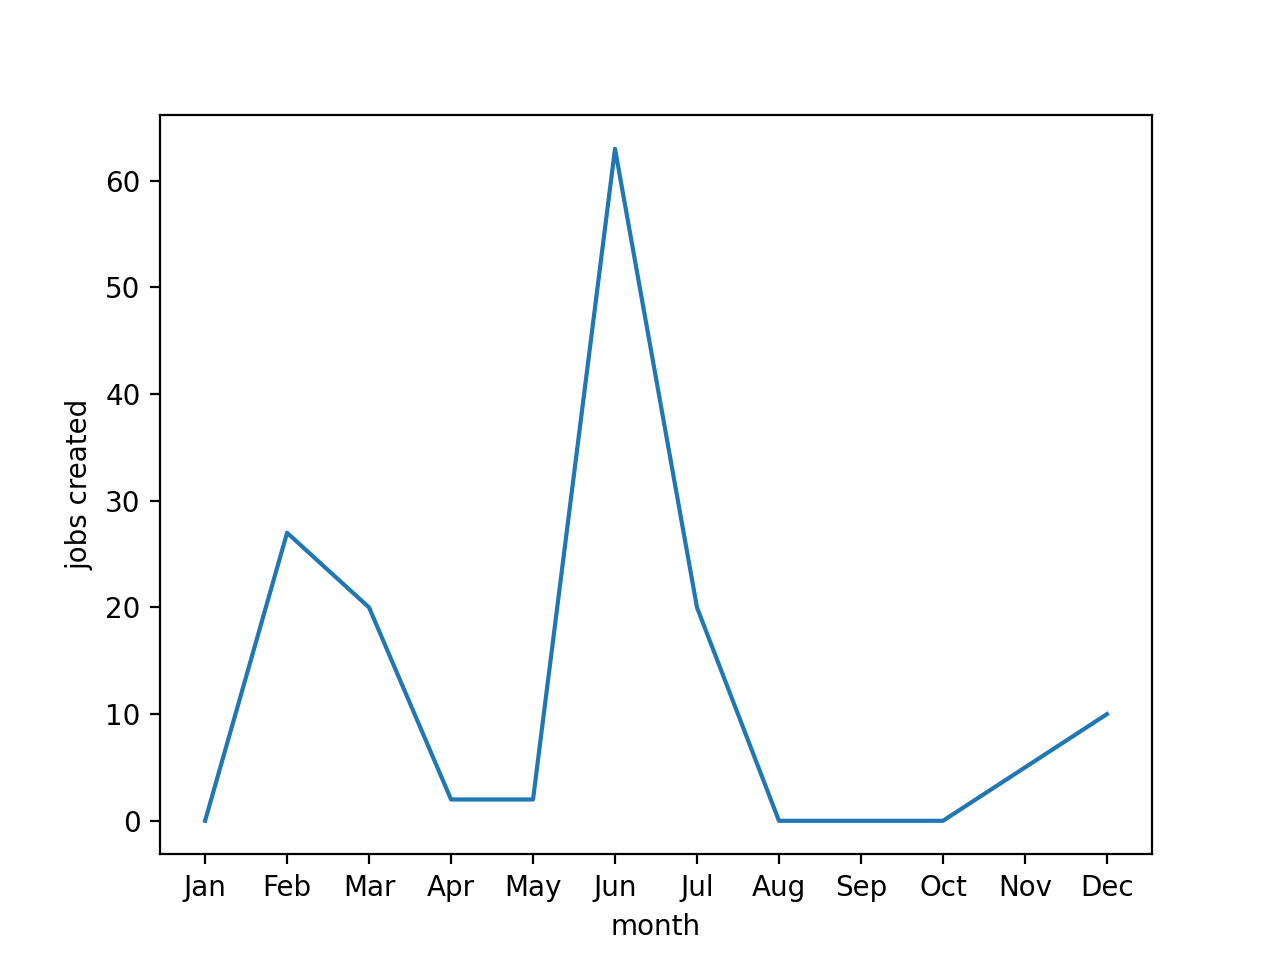

[[<matplotlib.axis.XTick at 0x7fb080804710>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')],
 Text(0.5, 0, 'month'),
 Text(0, 0.5, 'jobs created')]

In [143]:
# line plot of the total jobs created for each month.
data['month'] = data['Effective Date'].str.extract(r'(^\d\d)').astype(int)
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_jobs = data.groupby('month').sum()['Job created']
fig, ax = plt.subplots()
ax.plot(monthly_jobs.index,monthly_jobs)
ax.set(xticks=np.arange(1,13),xticklabels=labels,xlabel='month',ylabel='jobs created')